In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import pylab
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Dataset Overview

In [73]:
data = pd.read_csv("youtube_2025_dataset.csv")
data

,Channel Name,Youtuber Name,Total Videos,Best Video,Avg Video Length (min),Total Subscribers,Members Count,AI Generated Content (%),Neural Interface Compatible,Metaverse Integration Level,Quantum Computing Topics,Holographic Content Rating,Engagement Score,Content Value Index
0,Smith-Ross Labs,Eric Patel,68,VR Challenge: Review 2023,24.8,8264152,303319,9,True,Full,5,3D,130655.44,6.2
1,Sandoval PLC Hub,Cynthia Harrington,128,Nanotech Simulation: Analysis 2024,22.9,8768222,384629,62,False,NaN,4,3D,138624.73,21.4
2,"Jones, Moore and Ho Network",Amanda Walker,282,Metaverse Interface: Analysis 2024,24.0,6163386,361743,31,True,Advanced,6,1D,97442.53,13.5
3,Mitchell-Hooper Labs,Jessica Nelson MD,302,VR Protocol: Review 2023,24.6,4712268,58483,5,False,NaN,15,1D,74500.50,12.0
4,Wilson LLC Studios,Matthew Sherman,129,Nanotech Simulation: Review 2024,24.6,9592017,333873,63,True,NaN,12,3D,151648.85,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Flores-Daniel Studios,Jasmine Smith,106,AI Challenge: Experience 2023,22.0,2665835,267828,19,True,Full,1,3D,42146.59,6.4
4996,Spencer and Sons Studios,John Rasmussen,130,VR Challenge: Analysis 2023,26.3,136992,20019,67,True,Full,14,4D,2165.83,29.9
4997,Obrien-Roberts Studios,Lisa Burke,179,AI Challenge: Experience 2023,25.2,2314561,407346,99,True,Advanced,5,1D,36592.98,33.2
4998,King Ltd Hub,Steve Diaz,182,VR Synthesis: Showcase 2023,24.5,6954832,308313,1,True,Basic,9,4D,109955.22,6.6


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Channel Name                 5000 non-null   object 
 1   Youtuber Name                5000 non-null   object 
 2   Total Videos                 5000 non-null   int64  
 3   Best Video                   5000 non-null   object 
 4   Avg Video Length (min)       5000 non-null   float64
 5   Total Subscribers            5000 non-null   int64  
 6   Members Count                5000 non-null   int64  
 7   AI Generated Content (%)     5000 non-null   int64  
 8   Neural Interface Compatible  5000 non-null   bool   
 9   Metaverse Integration Level  3718 non-null   object 
 10  Quantum Computing Topics     5000 non-null   int64  
 11  Holographic Content Rating   5000 non-null   object 
 12  Engagement Score             5000 non-null   float64
 13  Content Value Inde

In [75]:
data.isna().sum()

,0
Channel Name,0
Youtuber Name,0
Total Videos,0
Best Video,0
Avg Video Length (min),0
Total Subscribers,0
Members Count,0
AI Generated Content (%),0
Neural Interface Compatible,0
Metaverse Integration Level,1282


# Avg Video Length (min) distribution

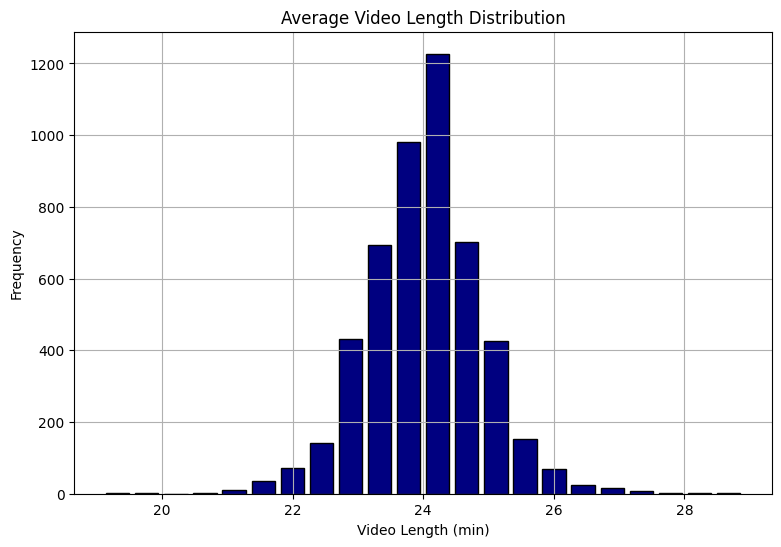

In [76]:
plt.figure(figsize=(9, 6))
plt.hist(data['Avg Video Length (min)'], rwidth = 0.8, color = 'navy', edgecolor = 'black', bins = 22)
plt.title("Average Video Length Distribution")
plt.xlabel("Video Length (min)")
plt.ylabel("Frequency")
plt.grid();

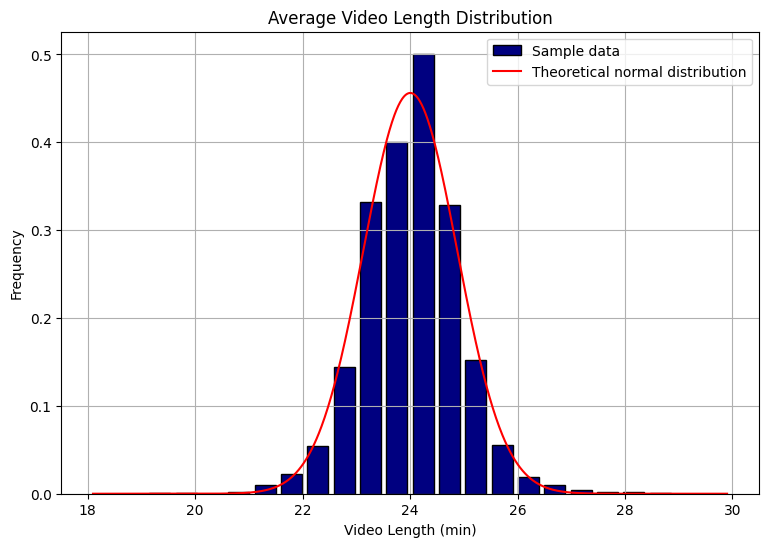

In [77]:
mean = data['Avg Video Length (min)'].mean()
std = data['Avg Video Length (min)'].std()

plt.figure(figsize=(9, 6))

plt.hist(data['Avg Video Length (min)'], rwidth = 0.8, color = 'navy', edgecolor = 'black', bins = 20, density=True, label='Sample data')

x = np.linspace(min(data['Avg Video Length (min)']) - 1, max(data['Avg Video Length (min)']) + 1, 1000)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r-', label='Theoretical normal distribution')

plt.title("Average Video Length Distribution")
plt.xlabel("Video Length (min)")
plt.ylabel("Frequency")
plt.legend()
plt.grid();

In [78]:
ks_statistic, ks_p_value = stats.kstest(data['Avg Video Length (min)'], 'norm', args=(mean, std))
ks_statistic, ks_p_value

(np.float64(0.05077623490802985), np.float64(1.211428691388611e-11))

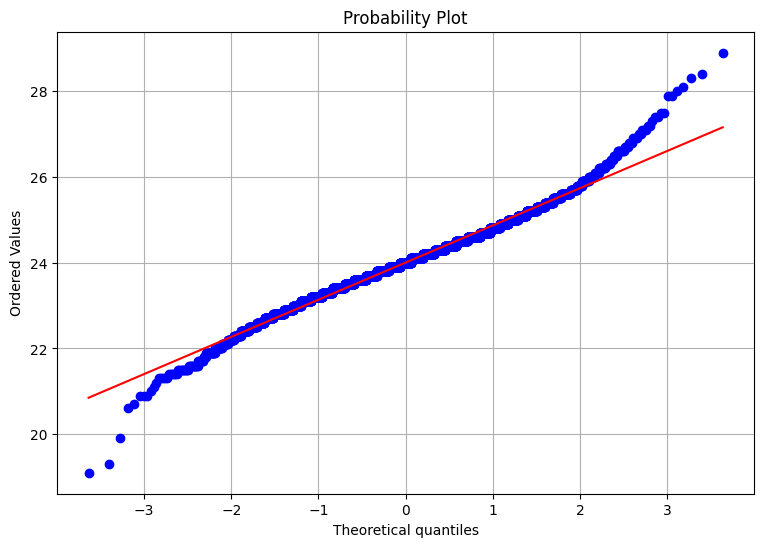

In [79]:
plt.figure(figsize=(9, 6))
stats.probplot(data['Avg Video Length (min)'], dist="norm", plot=pylab)
plt.grid();

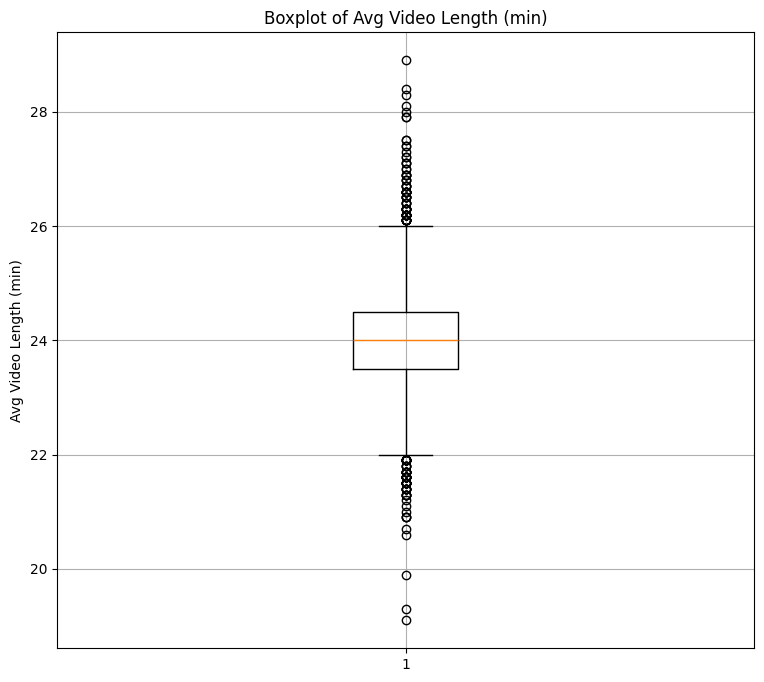

In [80]:
plt.figure(figsize=(9, 8))
plt.boxplot(data['Avg Video Length (min)'])
plt.title("Boxplot of Avg Video Length (min)")
plt.ylabel("Avg Video Length (min)")
plt.grid();

In [81]:
len(data['Avg Video Length (min)'])

5000

In [82]:
Q1 = data['Avg Video Length (min)'].quantile(0.25)
Q3 = data['Avg Video Length (min)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Avg Video Length (min)'] >= lower_bound) & (data['Avg Video Length (min)'] <= upper_bound)]
len(data['Avg Video Length (min)'])

4852

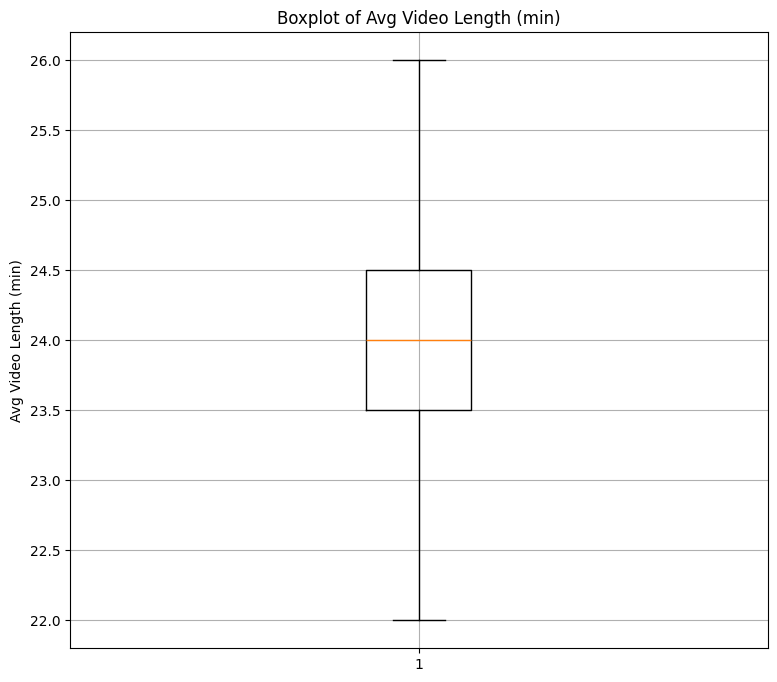

In [83]:
plt.figure(figsize=(9, 8))
plt.boxplot(data['Avg Video Length (min)'])
plt.title("Boxplot of Avg Video Length (min)")
plt.ylabel("Avg Video Length (min)")
plt.grid();

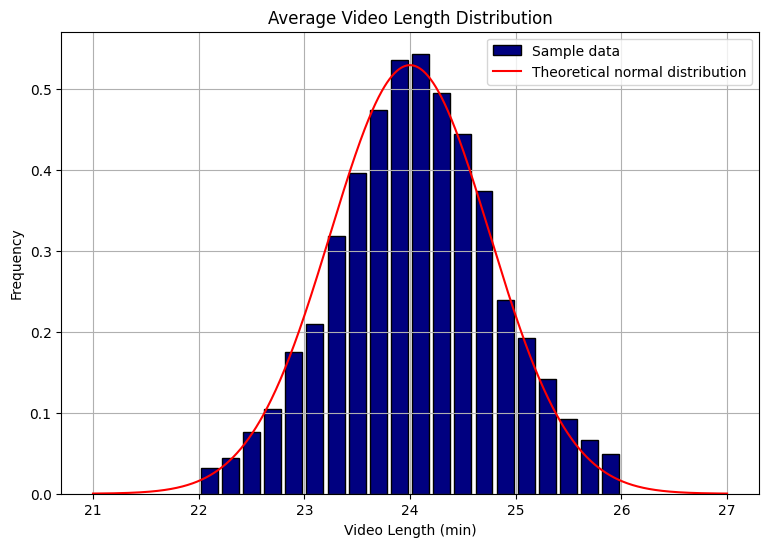

In [84]:
mean = data['Avg Video Length (min)'].mean()
std = data['Avg Video Length (min)'].std()

plt.figure(figsize=(9, 6))

plt.hist(data['Avg Video Length (min)'], rwidth = 0.8, color = 'navy', edgecolor = 'black', bins = 20, density=True, label='Sample data')

x = np.linspace(min(data['Avg Video Length (min)']) - 1, max(data['Avg Video Length (min)']) + 1, 1000)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r-', label='Theoretical normal distribution')

plt.title("Average Video Length Distribution")
plt.xlabel("Video Length (min)")
plt.ylabel("Frequency")
plt.legend()
plt.grid();

# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

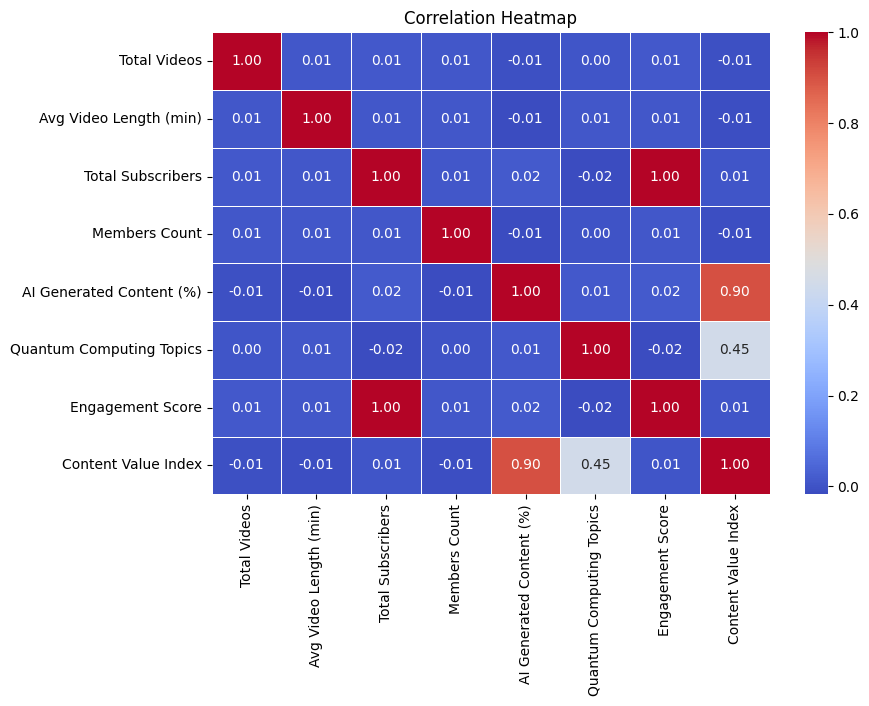

In [85]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# Visualizing Relationships with Scatter Plots

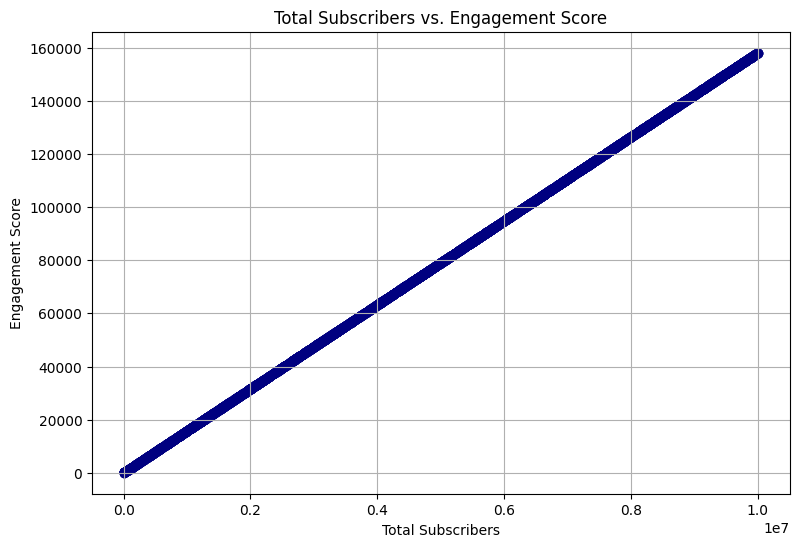

In [86]:
plt.figure(figsize=(9, 6))
plt.scatter(data['Total Subscribers'], data['Engagement Score'], color = 'navy')
plt.title("Total Subscribers vs. Engagement Score")
plt.xlabel("Total Subscribers")
plt.ylabel("Engagement Score")
plt.grid();

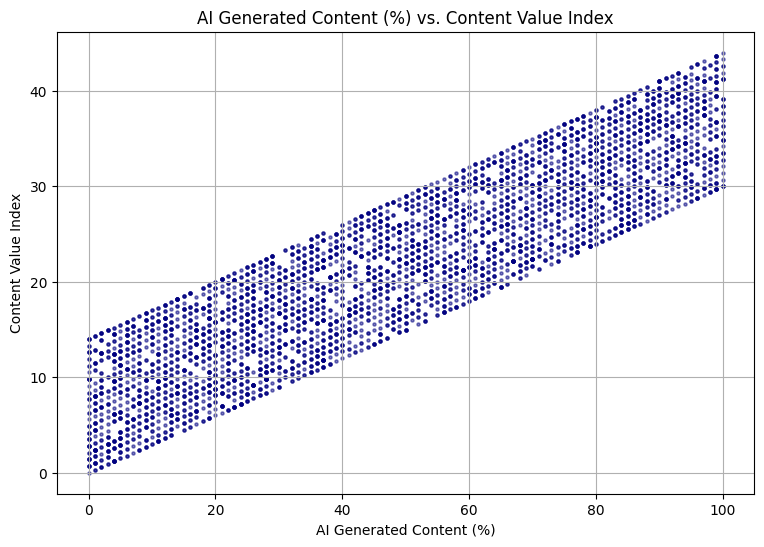

In [87]:
plt.figure(figsize=(9, 6))
plt.scatter(data['AI Generated Content (%)'], data['Content Value Index'], color = 'navy', s = 5, alpha = 0.5)
plt.title("AI Generated Content (%) vs. Content Value Index")
plt.xlabel("AI Generated Content (%)")
plt.ylabel("Content Value Index")
plt.grid();

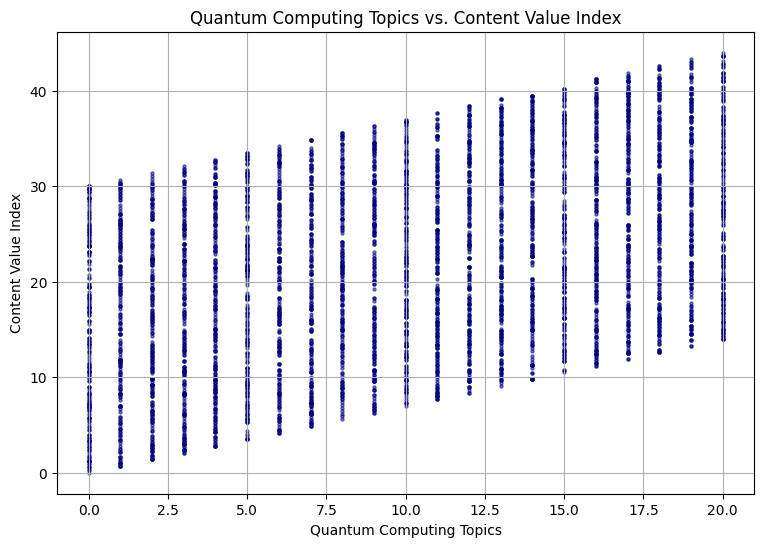

In [88]:
plt.figure(figsize=(9, 6))
plt.scatter(data['Quantum Computing Topics'], data['Content Value Index'], color = 'navy', s = 5, alpha = 0.5)
plt.title("Quantum Computing Topics vs. Content Value Index")
plt.xlabel("Quantum Computing Topics")
plt.ylabel("Content Value Index")
plt.grid();

# Content Value Index distribution

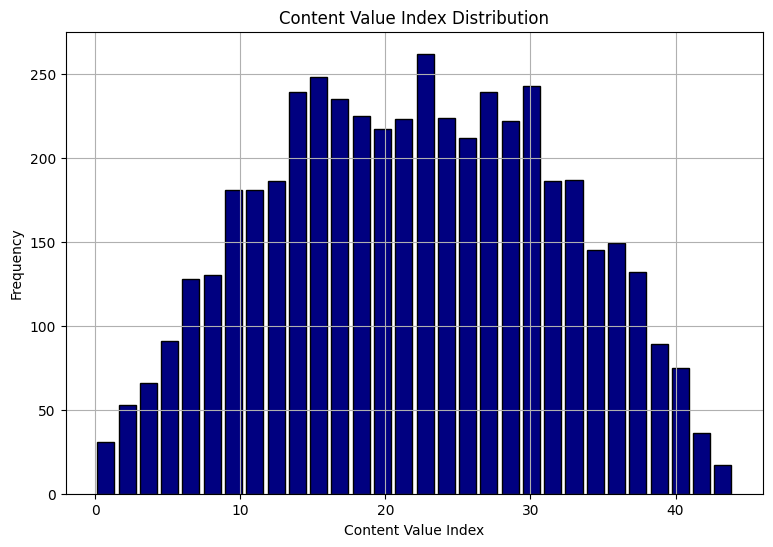

In [89]:
plt.figure(figsize=(9, 6))
plt.hist(data['Content Value Index'], rwidth = 0.8, color = 'navy', edgecolor = 'black', bins = 30)
plt.title("Content Value Index Distribution")
plt.xlabel("Content Value Index")
plt.ylabel("Frequency")
plt.grid();

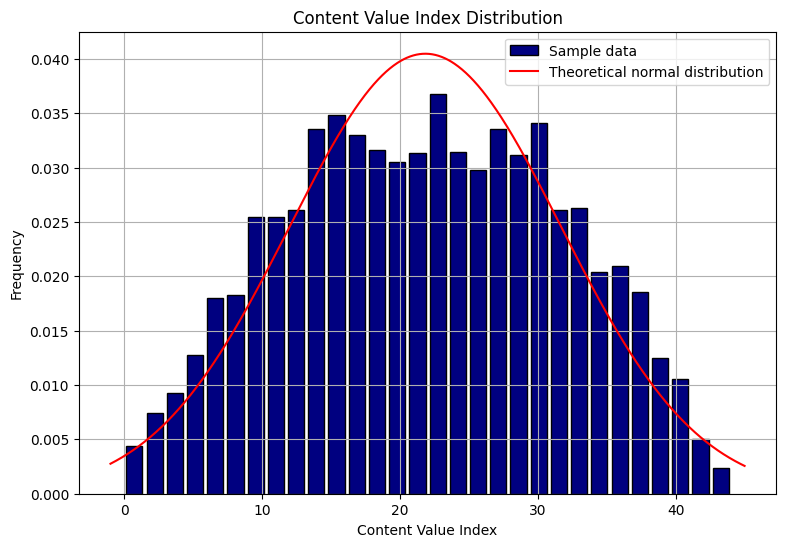

In [90]:
mean_content = data['Content Value Index'].mean()
std_content = data['Content Value Index'].std()

plt.figure(figsize=(9, 6))

plt.hist(data['Content Value Index'], rwidth = 0.8, color = 'navy', edgecolor = 'black', bins = 30, density=True, label='Sample data')

x = np.linspace(min(data['Content Value Index']) - 1, max(data['Content Value Index']) + 1, 1000)
pdf = norm.pdf(x, mean_content, std_content)
plt.plot(x, pdf, 'r-', label='Theoretical normal distribution')

plt.title("Content Value Index Distribution")
plt.xlabel("Content Value Index")
plt.ylabel("Frequency")
plt.legend()
plt.grid();

In [91]:
ks_statistic, ks_p_value = stats.kstest(data['Content Value Index'], 'norm', args=(mean_content, std_content))
ks_statistic, ks_p_value

(np.float64(0.04050522189932937), np.float64(2.358568873247093e-07))

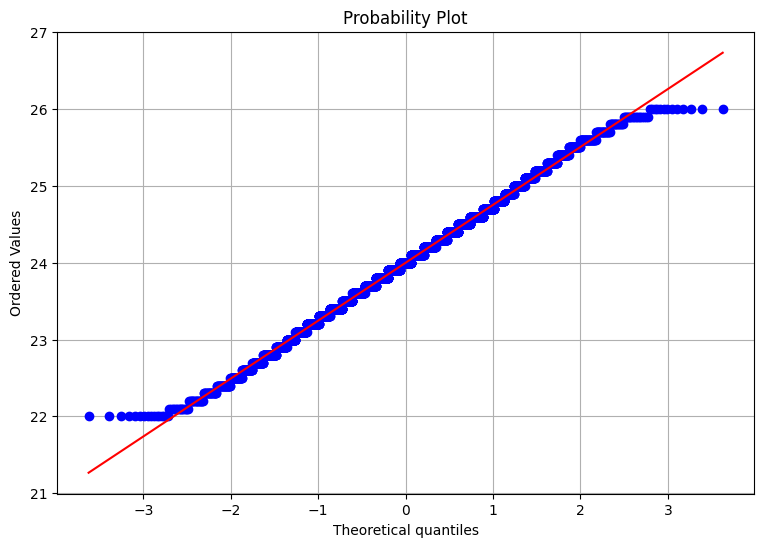

In [92]:
plt.figure(figsize=(9, 6))
stats.probplot(data['Avg Video Length (min)'], dist="norm", plot=pylab)
plt.grid();

# Student's t-test

In [93]:
group_true = data[data['Neural Interface Compatible'] == True]['Total Subscribers']
group_false = data[data['Neural Interface Compatible'] == False]['Total Subscribers']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(-0.004613266411242747), np.float64(0.9963193487435579))

In [94]:
group_true = data[data['Neural Interface Compatible'] == True]['Members Count']
group_false = data[data['Neural Interface Compatible'] == False]['Members Count']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(1.5732651137071372), np.float64(0.11572267063376739))

In [95]:
group_true = data[data['Neural Interface Compatible'] == True]['Avg Video Length (min)']
group_false = data[data['Neural Interface Compatible'] == False]['Avg Video Length (min)']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(1.9406038852087422), np.float64(0.05236421741578621))

In [96]:
group_true = data[data['Neural Interface Compatible'] == True]['Content Value Index']
group_false = data[data['Neural Interface Compatible'] == False]['Content Value Index']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(0.980980511479163), np.float64(0.32665128280692635))

In [97]:
group_true = data[data['Neural Interface Compatible'] == True]['Engagement Score']
group_false = data[data['Neural Interface Compatible'] == False]['Engagement Score']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(-0.004613195815110418), np.float64(0.9963194050676191))

In [98]:
group_true = data[data['Neural Interface Compatible'] == True]['Total Videos']
group_false = data[data['Neural Interface Compatible'] == False]['Total Videos']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(-0.014450197774065622), np.float64(0.9884714058839282))

In [99]:
group_true = data[data['Neural Interface Compatible'] == True]['AI Generated Content (%)']
group_false = data[data['Neural Interface Compatible'] == False]['AI Generated Content (%)']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(0.951091695664362), np.float64(0.34160522261067927))

In [100]:
group_true = data[data['Neural Interface Compatible'] == True]['Quantum Computing Topics']
group_false = data[data['Neural Interface Compatible'] == False]['Quantum Computing Topics']

t_stat, p_value = stats.ttest_ind(group_true, group_false)
t_stat, p_value

(np.float64(0.2986143443606467), np.float64(0.765247112274944))

# ANOVA (Analysis of Variance)

In [101]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Avg Video Length (min)'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.2892173085271228), np.float64(0.7488668495077782))

In [102]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Total Subscribers'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.493450864756479), np.float64(0.6105572228288718))

In [103]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Members Count'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(1.517871293043663), np.float64(0.2193181532864739))

In [104]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Content Value Index'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.5366483755712625), np.float64(0.584751437011281))

In [105]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Engagement Score'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.4934508474358001), np.float64(0.6105572334012244))

In [106]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Total Videos'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(1.6272358579984847), np.float64(0.19661633678001134))

In [107]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['AI Generated Content (%)'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.9448990747577192), np.float64(0.3888151578857023))

In [108]:
groups = data.dropna(subset=['Metaverse Integration Level'])
grouped = groups.groupby('Metaverse Integration Level')['Quantum Computing Topics'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.13632353545655743), np.float64(0.8725647855360599))

In [109]:
data['Holographic Content Rating'].unique()

array(['3D', '1D', '2D', '4D'], dtype=object)

In [110]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Avg Video Length (min)'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.5933372275510331), np.float64(0.6193255413427317))

In [111]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Total Subscribers'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.8836419338186656), np.float64(0.44870933202674235))

In [112]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Members Count'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.8896466533880981), np.float64(0.4456102668624857))

In [113]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Content Value Index'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.487264110985821), np.float64(0.691132459311416))

In [114]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Engagement Score'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.8836419857023519), np.float64(0.4487093051740634))

In [115]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Total Videos'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.8165560207273389), np.float64(0.4845230719413821))

In [116]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['AI Generated Content (%)'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.68231383481811), np.float64(0.5627665259744503))

In [117]:
groups = data.dropna(subset=['Holographic Content Rating'])
grouped = groups.groupby('Holographic Content Rating')['Quantum Computing Topics'].apply(list)

f_stat, p_value = stats.f_oneway(*grouped)
f_stat, p_value

(np.float64(0.34561431926627845), np.float64(0.7923389844915322))

# Chi-square statistic

In [118]:
contingency_table = pd.crosstab(data['Neural Interface Compatible'], data['Metaverse Integration Level'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p_value

(np.float64(0.6875252488472245), np.float64(0.7090972304370724))

# Linear Regression

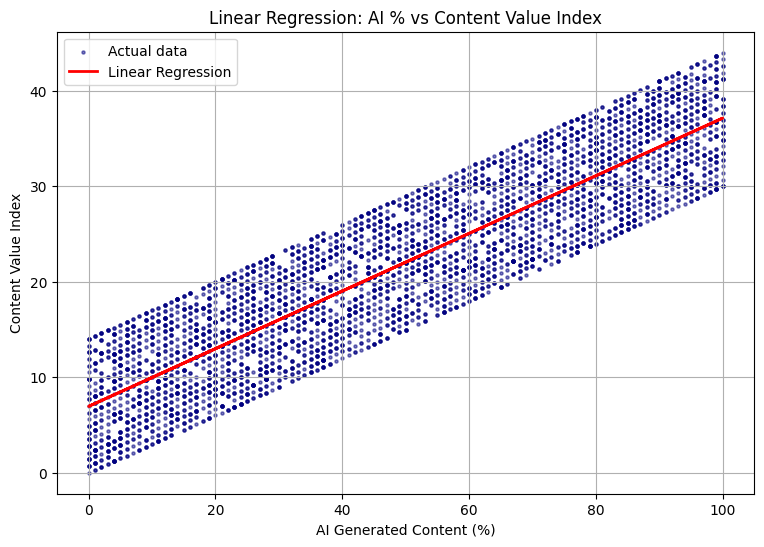

In [119]:
X = data[['AI Generated Content (%)']]
y = data['Content Value Index']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(data['AI Generated Content (%)'], data['Content Value Index'], color = 'navy', s = 5, alpha = 0.5, label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('AI Generated Content (%)')
plt.ylabel('Content Value Index')
plt.title('Linear Regression: AI % vs Content Value Index')
plt.legend()
plt.grid()
plt.show()

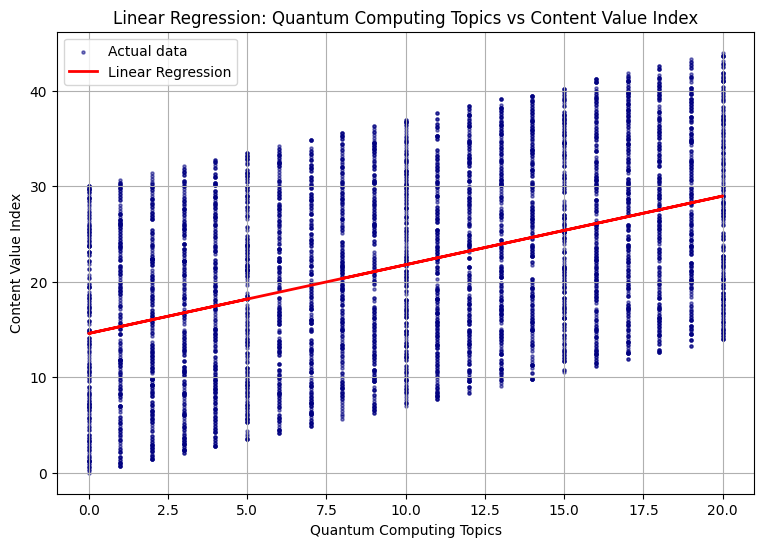

In [120]:
X = data[['Quantum Computing Topics']]
y = data['Content Value Index']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(data['Quantum Computing Topics'], data['Content Value Index'], color = 'navy', s = 5, alpha = 0.5, label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Quantum Computing Topics')
plt.ylabel('Content Value Index')
plt.title('Linear Regression: Quantum Computing Topics vs Content Value Index')
plt.legend()
plt.grid()
plt.show()